In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor


flight_data = pd.read_csv('../DataSets/Modified_Flight_Data.csv')

In [2]:
flight_data.head(10)

,Unnamed: 0,Airline,Departure,Destination,Departure_date,Arrival_date,Ticket_Price(Dollars),Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class
0,0,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1178.0,2,31,Autumn,Sunday,True,First
1,1,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-03,1218.0,2,42,Autumn,Sunday,True,First
2,2,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-04,667.0,2,23,Autumn,Sunday,True,Business
3,3,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1064.0,1,28,Autumn,Sunday,True,First
4,4,Air India,Kathmandu,Chicago,2023-10-01,2023-10-02,1476.0,2,41,Autumn,Sunday,True,First
5,5,Korean Air,Kathmandu,Chicago,2023-10-01,2023-10-01,1368.0,1,36,Autumn,Sunday,True,First
6,6,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-02,638.0,1,22,Autumn,Sunday,True,Business
7,7,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-02,841.0,2,29,Autumn,Sunday,True,Business
8,8,Air India,Kathmandu,Chicago,2023-10-01,2023-10-03,1368.0,1,38,Autumn,Sunday,True,First
9,9,Korean Air,Kathmandu,Chicago,2023-10-01,2023-10-03,1064.0,3,28,Autumn,Sunday,True,First


In [3]:
flights_2023 = flight_data.drop(columns=["Unnamed: 0"])
flights_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                26496 non-null  object 
 1   Departure              26496 non-null  object 
 2   Destination            26496 non-null  object 
 3   Departure_date         26496 non-null  object 
 4   Arrival_date           26496 non-null  object 
 5   Ticket_Price(Dollars)  26496 non-null  float64
 6   Stops                  26496 non-null  int64  
 7   Travel_Time            26496 non-null  int64  
 8   Seasons                26496 non-null  object 
 9   Day_of_the_week        26496 non-null  object 
 10  is_weekend             26496 non-null  bool   
 11  Flight_Class           26496 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [4]:
flights_2023

,Airline,Departure,Destination,Departure_date,Arrival_date,Ticket_Price(Dollars),Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class
0,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1178.0,2,31,Autumn,Sunday,True,First
1,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-03,1218.0,2,42,Autumn,Sunday,True,First
2,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-04,667.0,2,23,Autumn,Sunday,True,Business
3,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1064.0,1,28,Autumn,Sunday,True,First
4,Air India,Kathmandu,Chicago,2023-10-01,2023-10-02,1476.0,2,41,Autumn,Sunday,True,First
...,...,...,...,...,...,...,...,...,...,...,...,...
26491,Etihad,New York,Singapore,2024-01-17,2024-01-18,990.0,1,33,Winter,Wednesday,False,Business
26492,Emirates,New York,Singapore,2024-01-17,2024-01-19,1400.0,1,35,Winter,Wednesday,False,First
26493,Korean Air,New York,Singapore,2024-01-17,2024-01-18,1972.0,1,29,Winter,Wednesday,False,First
26494,United Airlines,New York,Singapore,2024-01-17,2024-01-18,700.0,2,28,Winter,Wednesday,False,Business


In [5]:
flights_2023["Flight_Class"].value_counts()

Flight_Class
First       12124
Business     8397
Economy      5975
Name: count, dtype: int64

In [6]:
flights_2023["Flight_Class"].value_counts(normalize=True)*100

Flight_Class
First       45.757850
Business    31.691576
Economy     22.550574
Name: proportion, dtype: float64

In [6]:
# Show data visually 

# flights_2023.plot(x="Departure_date", y="Ticket_Price(Dollars)")
# plt.xticks(rotation = 45)

We can see that First class has a proportion of 45.75 percent, Business class has a proportion of 31.69 percent and Economy class has a proportion of 22.55 percent. If we develop a machine learning model just on the data set according the data proportion percentages then the flight class with the lowest proportion will have a hard time being predicted.

# EDA

We will now extract the month and date of journey from the Departure date column

.dt.day method extracts only the day of that date

.dt.month method will extract only month of that date

In [7]:
# Extracting Departure day and month

flights_2023['Departure_Month'] = pd.to_datetime(flights_2023["Departure_date"], format="%Y-%m-%d").dt.month

flights_2023['Departure_Day'] = pd.to_datetime(flights_2023.Departure_date, format= "%Y-%m-%d").dt.day

In [8]:
flights_2023.head(10)

,Airline,Departure,Destination,Departure_date,Arrival_date,Ticket_Price(Dollars),Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class,Departure_Month,Departure_Day
0,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1178.0,2,31,Autumn,Sunday,True,First,10,1
1,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-03,1218.0,2,42,Autumn,Sunday,True,First,10,1
2,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-04,667.0,2,23,Autumn,Sunday,True,Business,10,1
3,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1064.0,1,28,Autumn,Sunday,True,First,10,1
4,Air India,Kathmandu,Chicago,2023-10-01,2023-10-02,1476.0,2,41,Autumn,Sunday,True,First,10,1
5,Korean Air,Kathmandu,Chicago,2023-10-01,2023-10-01,1368.0,1,36,Autumn,Sunday,True,First,10,1
6,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-02,638.0,1,22,Autumn,Sunday,True,Business,10,1
7,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-02,841.0,2,29,Autumn,Sunday,True,Business,10,1
8,Air India,Kathmandu,Chicago,2023-10-01,2023-10-03,1368.0,1,38,Autumn,Sunday,True,First,10,1
9,Korean Air,Kathmandu,Chicago,2023-10-01,2023-10-03,1064.0,3,28,Autumn,Sunday,True,First,10,1


In [9]:
# Now we drop the Departure_date column as we have extracted the required values

flights_2023.drop(['Departure_date'], axis=1, inplace=True)

In [10]:
#Extracting Arrival month and date 

flights_2023['Arrival_Month'] = pd.to_datetime(flights_2023['Arrival_date'], format="%Y-%m-%d").dt.month

flights_2023['Arrival_Day'] = pd.to_datetime(flights_2023.Arrival_date, format= "%Y-%m-%d").dt.day

In [11]:
flights_2023.drop(columns=['Arrival_date'], axis=1, inplace=True)

In [12]:
flights_2023.head(10)

,Airline,Departure,Destination,Ticket_Price(Dollars),Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class,Departure_Month,Departure_Day,Arrival_Month,Arrival_Day
0,Qatar Airways,Kathmandu,Chicago,1178.0,2,31,Autumn,Sunday,True,First,10,1,10,1
1,Emirates,Kathmandu,Chicago,1218.0,2,42,Autumn,Sunday,True,First,10,1,10,3
2,Emirates,Kathmandu,Chicago,667.0,2,23,Autumn,Sunday,True,Business,10,1,10,4
3,Qatar Airways,Kathmandu,Chicago,1064.0,1,28,Autumn,Sunday,True,First,10,1,10,1
4,Air India,Kathmandu,Chicago,1476.0,2,41,Autumn,Sunday,True,First,10,1,10,2
5,Korean Air,Kathmandu,Chicago,1368.0,1,36,Autumn,Sunday,True,First,10,1,10,1
6,Emirates,Kathmandu,Chicago,638.0,1,22,Autumn,Sunday,True,Business,10,1,10,2
7,Emirates,Kathmandu,Chicago,841.0,2,29,Autumn,Sunday,True,Business,10,1,10,2
8,Air India,Kathmandu,Chicago,1368.0,1,38,Autumn,Sunday,True,First,10,1,10,3
9,Korean Air,Kathmandu,Chicago,1064.0,3,28,Autumn,Sunday,True,First,10,1,10,3


# Handling Categorical Data

Nominal data -> data are not in any order -> OneHotEncoder is used in this case

Ordinal data -> data are in order -> LabelEncoder is used in this case 

Before splitting the dataset into train and test sets we will perform OneHotEncoding to handle the Categorical values such as Airlines, Departure, Destination etc.

In [13]:
flights_2023['Airline'].value_counts()

Airline
Qatar Airways         3198
Air India             3074
Turkish Airlines      2034
China Southern        1809
Cathay Pacific        1674
Lufthansa             1641
Emirates              1256
SWISS                 1002
Korean Air             983
American Airlines      849
Qantas                 776
British Airways        641
IndiGo                 594
Air France             563
THAI                   540
United Airlines        527
Singapore Airlines     495
China Eastern          484
Delta                  478
Easy Jet               427
Nepal Airlines         406
flydubai               389
Malaysia Airlines      379
Etihad                 328
Austrian               259
Air China              257
Brusseis               215
Air Arabia             209
Air Canada             206
Virgin Atlantic        203
Vueling                199
Luxiar                 160
Malindo Air            125
SriLankan Airlines     116
Name: count, dtype: int64

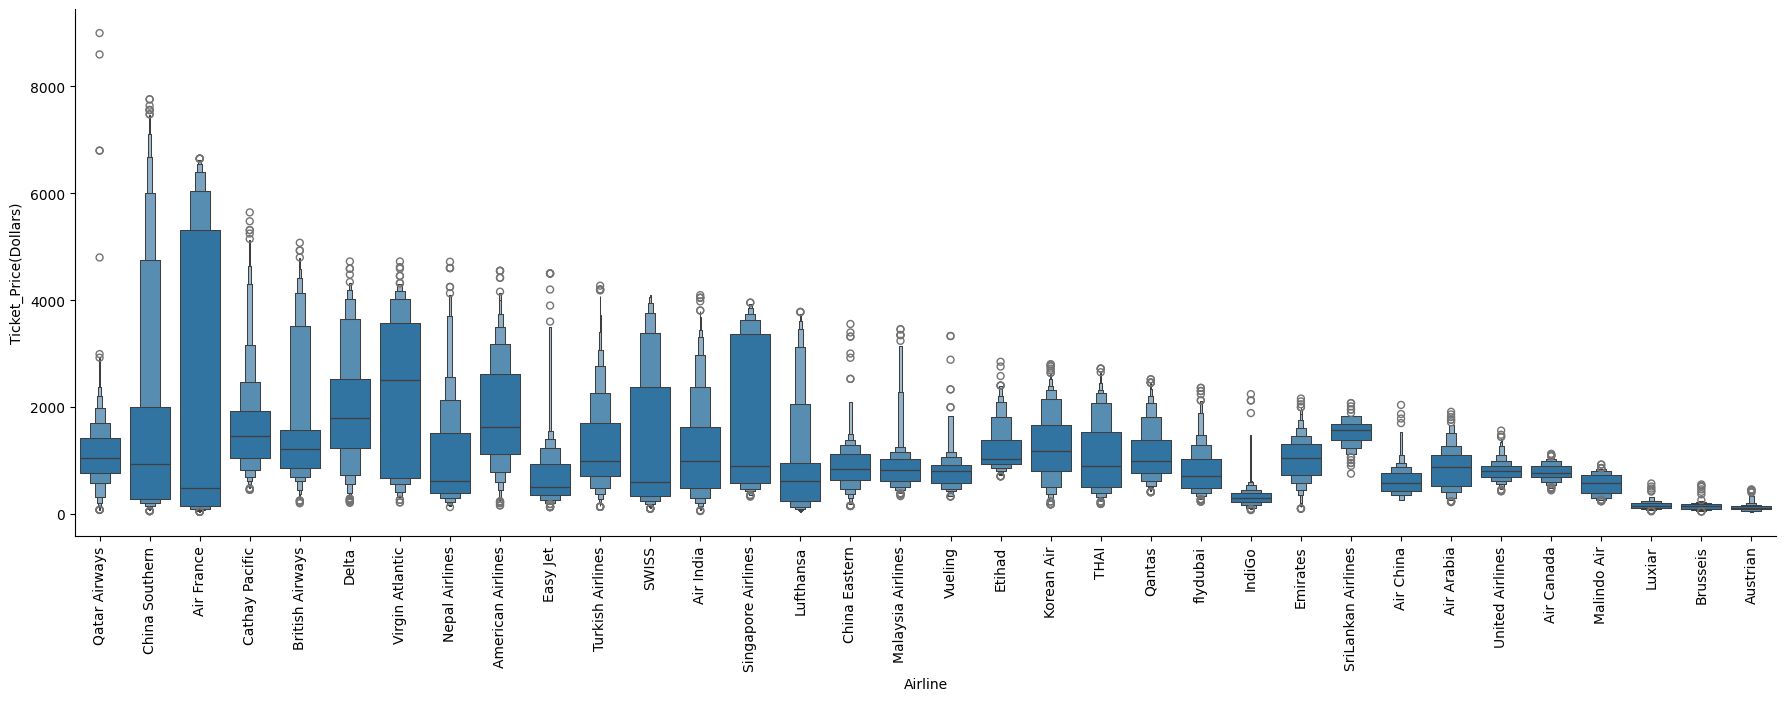

In [14]:
sns.catplot( y = 'Ticket_Price(Dollars)', x = 'Airline', data= flights_2023.sort_values("Ticket_Price(Dollars)", ascending=False), kind='boxen', height=6, aspect=3)
plt.xticks(rotation = 90)
plt.show()

Here we can see a significant variation between the prices of different airlines. Qatar Airways has the highest ticket price while Nepal Airlines has the lowest ticket price 

In [15]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = flights_2023[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first=False, dtype=int)

Airline.head()

,Airline_Air Arabia,Airline_Air Canada,Airline_Air China,Airline_Air France,Airline_Air India,Airline_American Airlines,Airline_Austrian,Airline_British Airways,Airline_Brusseis,Airline_Cathay Pacific,...,Airline_Qatar Airways,Airline_SWISS,Airline_Singapore Airlines,Airline_SriLankan Airlines,Airline_THAI,Airline_Turkish Airlines,Airline_United Airlines,Airline_Virgin Atlantic,Airline_Vueling,Airline_flydubai
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here OneHotEncoder displays 1 for the index where the respective airline is present and 0 for the others.

In [16]:
flights_2023['Departure'].value_counts()

Departure
Kathmandu    6055
Sydney       4230
New Delhi    3777
London       3104
New York     2707
Paris        2351
Dubai        2019
Chicago      1462
Beijing       505
Berlin        174
Delhi         112
Name: count, dtype: int64

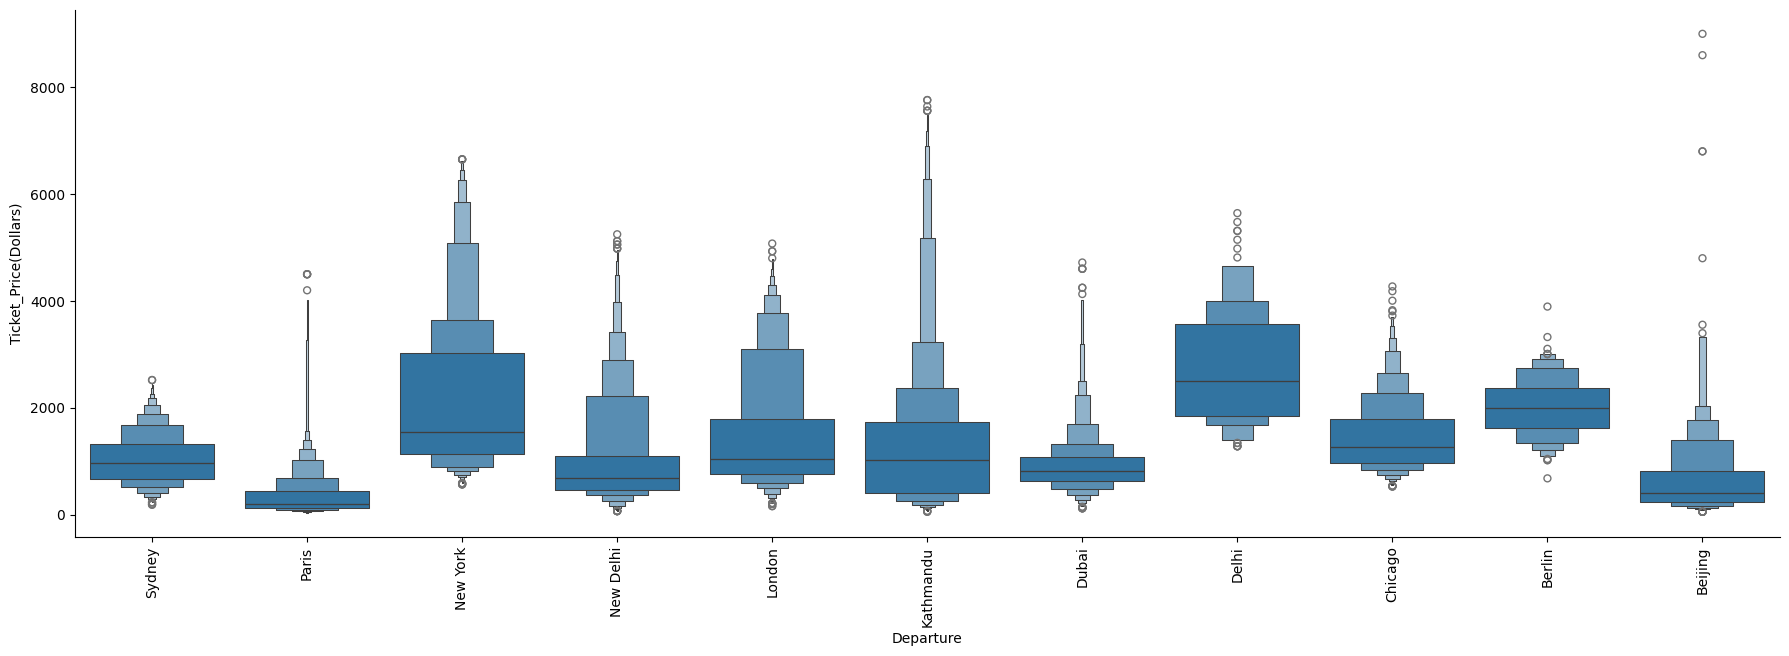

In [17]:
sns.catplot( y = 'Ticket_Price(Dollars)', x = 'Departure', data= flights_2023.sort_values("Departure", ascending=False), kind='boxen', height=6, aspect=3)
plt.xticks(rotation = 90)
plt.show()

In [18]:
# Encoding Source

Source = flights_2023[["Departure"]]

Source = pd.get_dummies(Source, drop_first=False, dtype=int)

Source.head()

,Departure_Beijing,Departure_Berlin,Departure_Chicago,Departure_Delhi,Departure_Dubai,Departure_Kathmandu,Departure_London,Departure_New Delhi,Departure_New York,Departure_Paris,Departure_Sydney
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


In [19]:
flights_2023['Destination'].value_counts()

Destination
Singapore    5325
New York     5006
Kathmandu    4698
Beijing      2537
Berlin       2449
Sydney       1859
London       1685
Chicago      1575
Dubai         847
New Delhi     515
Name: count, dtype: int64

In [20]:
# Encoding 

Destination = flights_2023[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first=False, dtype=int)

Destination.head()

,Destination_Beijing,Destination_Berlin,Destination_Chicago,Destination_Dubai,Destination_Kathmandu,Destination_London,Destination_New Delhi,Destination_New York,Destination_Singapore,Destination_Sydney
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [21]:
flights_2023['Day_of_the_week'].value_counts()



Day_of_the_week
Sunday       5482
Saturday     4594
Tuesday      4514
Thursday     3344
Friday       3146
Monday       3118
Wednesday    2298
Name: count, dtype: int64

In [22]:
# Encoding 

Week_Days = flights_2023[['Day_of_the_week']]

Week_Days = pd.get_dummies(Week_Days, drop_first= False, dtype=int)

Week_Days.head()

,Day_of_the_week_Friday,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [23]:
flights_2023['Flight_Class'].value_counts()

Flight_Class
First       12124
Business     8397
Economy      5975
Name: count, dtype: int64

In [24]:
# Encoding 

Class = flights_2023[["Flight_Class"]]

Class = pd.get_dummies(Class, drop_first=False, dtype=int)

Class.head()


,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [25]:
# Concatenating dataframe -> flights_2023 + Airline + Source + Destination

flights_2023_encoding = pd.concat([flights_2023, Airline, Source, Destination, Week_Days, Class], axis=1)

flights_2023_encoding.head(10)

,Airline,Departure,Destination,Ticket_Price(Dollars),Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class,...,Day_of_the_week_Friday,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First
0,Qatar Airways,Kathmandu,Chicago,1178.0,2,31,Autumn,Sunday,True,First,...,0,0,0,1,0,0,0,0,0,1
1,Emirates,Kathmandu,Chicago,1218.0,2,42,Autumn,Sunday,True,First,...,0,0,0,1,0,0,0,0,0,1
2,Emirates,Kathmandu,Chicago,667.0,2,23,Autumn,Sunday,True,Business,...,0,0,0,1,0,0,0,1,0,0
3,Qatar Airways,Kathmandu,Chicago,1064.0,1,28,Autumn,Sunday,True,First,...,0,0,0,1,0,0,0,0,0,1
4,Air India,Kathmandu,Chicago,1476.0,2,41,Autumn,Sunday,True,First,...,0,0,0,1,0,0,0,0,0,1
5,Korean Air,Kathmandu,Chicago,1368.0,1,36,Autumn,Sunday,True,First,...,0,0,0,1,0,0,0,0,0,1
6,Emirates,Kathmandu,Chicago,638.0,1,22,Autumn,Sunday,True,Business,...,0,0,0,1,0,0,0,1,0,0
7,Emirates,Kathmandu,Chicago,841.0,2,29,Autumn,Sunday,True,Business,...,0,0,0,1,0,0,0,1,0,0
8,Air India,Kathmandu,Chicago,1368.0,1,38,Autumn,Sunday,True,First,...,0,0,0,1,0,0,0,0,0,1
9,Korean Air,Kathmandu,Chicago,1064.0,3,28,Autumn,Sunday,True,First,...,0,0,0,1,0,0,0,0,0,1


In [26]:
flights_2023_encoding.shape

(26496, 79)

In [27]:
flights_2023_encoding.columns

Index(['Airline', 'Departure', 'Destination', 'Ticket_Price(Dollars)', 'Stops',
       'Travel_Time', 'Seasons', 'Day_of_the_week', 'is_weekend',
       'Flight_Class', 'Departure_Month', 'Departure_Day', 'Arrival_Month',
       'Arrival_Day', 'Airline_Air Arabia', 'Airline_Air Canada',
       'Airline_Air China', 'Airline_Air France', 'Airline_Air India',
       'Airline_American Airlines', 'Airline_Austrian',
       'Airline_British Airways', 'Airline_Brusseis', 'Airline_Cathay Pacific',
       'Airline_China Eastern', 'Airline_China Southern', 'Airline_Delta',
       'Airline_Easy Jet', 'Airline_Emirates', 'Airline_Etihad',
       'Airline_IndiGo', 'Airline_Korean Air', 'Airline_Lufthansa',
       'Airline_Luxiar', 'Airline_Malaysia Airlines', 'Airline_Malindo Air',
       'Airline_Nepal Airlines', 'Airline_Qantas', 'Airline_Qatar Airways',
       'Airline_SWISS', 'Airline_Singapore Airlines',
       'Airline_SriLankan Airlines', 'Airline_THAI',
       'Airline_Turkish Airlines', 'A

In [28]:
# Seperating Independent and Target variables

X = flights_2023_encoding.drop(columns=["Ticket_Price(Dollars)"])

y = flights_2023_encoding["Ticket_Price(Dollars)"]

In [29]:
X

,Airline,Departure,Destination,Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class,Departure_Month,...,Day_of_the_week_Friday,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First
0,Qatar Airways,Kathmandu,Chicago,2,31,Autumn,Sunday,True,First,10,...,0,0,0,1,0,0,0,0,0,1
1,Emirates,Kathmandu,Chicago,2,42,Autumn,Sunday,True,First,10,...,0,0,0,1,0,0,0,0,0,1
2,Emirates,Kathmandu,Chicago,2,23,Autumn,Sunday,True,Business,10,...,0,0,0,1,0,0,0,1,0,0
3,Qatar Airways,Kathmandu,Chicago,1,28,Autumn,Sunday,True,First,10,...,0,0,0,1,0,0,0,0,0,1
4,Air India,Kathmandu,Chicago,2,41,Autumn,Sunday,True,First,10,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,Etihad,New York,Singapore,1,33,Winter,Wednesday,False,Business,1,...,0,0,0,0,0,0,1,1,0,0
26492,Emirates,New York,Singapore,1,35,Winter,Wednesday,False,First,1,...,0,0,0,0,0,0,1,0,0,1
26493,Korean Air,New York,Singapore,1,29,Winter,Wednesday,False,First,1,...,0,0,0,0,0,0,1,0,0,1
26494,United Airlines,New York,Singapore,2,28,Winter,Wednesday,False,Business,1,...,0,0,0,0,0,0,1,1,0,0


In [30]:
y

0        1178.0
1        1218.0
2         667.0
3        1064.0
4        1476.0
          ...  
26491     990.0
26492    1400.0
26493    1972.0
26494     700.0
26495    2970.0
Name: Ticket_Price(Dollars), Length: 26496, dtype: float64

In [31]:
# Splitting data into test and train sets using strafied sampling on flight class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=flights_2023_encoding['Flight_Class'])

In [32]:
X_train

,Airline,Departure,Destination,Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class,Departure_Month,...,Day_of_the_week_Friday,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First
25077,flydubai,Kathmandu,Dubai,1,11,Winter,Saturday,True,Business,1,...,0,0,1,0,0,0,0,1,0,0
57,American Airlines,London,New York,0,29,Autumn,Sunday,True,First,10,...,0,0,0,1,0,0,0,0,0,1
4138,Etihad,Chicago,Kathmandu,2,44,Autumn,Saturday,True,First,10,...,0,0,1,0,0,0,0,0,0,1
2620,Cathay Pacific,Sydney,Singapore,1,15,Autumn,Friday,False,Business,10,...,1,0,0,0,0,0,0,1,0,0
3578,Air France,New Delhi,Berlin,1,18,Autumn,Thursday,False,Economy,10,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,SriLankan Airlines,New Delhi,Sydney,2,23,Autumn,Wednesday,False,First,10,...,0,0,0,0,0,0,1,0,0,1
3415,Qatar Airways,London,Singapore,2,21,Autumn,Wednesday,False,Business,10,...,0,0,0,0,0,0,1,1,0,0
14810,Virgin Atlantic,London,New York,1,21,Winter,Friday,False,Business,12,...,1,0,0,0,0,0,0,1,0,0
24376,IndiGo,New Delhi,Kathmandu,1,5,Winter,Tuesday,False,Economy,1,...,0,0,0,0,0,1,0,0,1,0


In [33]:
X_train['Flight_Class'].value_counts(normalize=True)

Flight_Class
First       0.457594
Business    0.316925
Economy     0.225481
Name: proportion, dtype: float64

In [34]:
X_train.value_counts()

Airline         Departure  Destination  Stops  Travel_Time  Seasons  Day_of_the_week  is_weekend  Flight_Class  Departure_Month  Departure_Day  Arrival_Month  Arrival_Day  Airline_Air Arabia  Airline_Air Canada  Airline_Air China  Airline_Air France  Airline_Air India  Airline_American Airlines  Airline_Austrian  Airline_British Airways  Airline_Brusseis  Airline_Cathay Pacific  Airline_China Eastern  Airline_China Southern  Airline_Delta  Airline_Easy Jet  Airline_Emirates  Airline_Etihad  Airline_IndiGo  Airline_Korean Air  Airline_Lufthansa  Airline_Luxiar  Airline_Malaysia Airlines  Airline_Malindo Air  Airline_Nepal Airlines  Airline_Qantas  Airline_Qatar Airways  Airline_SWISS  Airline_Singapore Airlines  Airline_SriLankan Airlines  Airline_THAI  Airline_Turkish Airlines  Airline_United Airlines  Airline_Virgin Atlantic  Airline_Vueling  Airline_flydubai  Departure_Beijing  Departure_Berlin  Departure_Chicago  Departure_Delhi  Departure_Dubai  Departure_Kathmandu  Departure_Londo

In [35]:
y_train

25077     506.0
57       3915.0
4138     2156.0
2620      615.0
3578      396.0
          ...  
1955     1219.0
3415      588.0
14810     504.0
24376     275.0
14000    5670.0
Name: Ticket_Price(Dollars), Length: 18547, dtype: float64

In [36]:
y_train.value_counts(normalize=True)*100

Ticket_Price(Dollars)
840.0     0.663180
900.0     0.447512
990.0     0.436728
720.0     0.431337
600.0     0.431337
            ...   
2091.0    0.005392
4301.0    0.005392
213.0     0.005392
2009.0    0.005392
1615.0    0.005392
Name: proportion, Length: 1635, dtype: float64

In [37]:
# Combining X_train and y_train datasets

Train_Data = pd.concat([X_train, y_train], axis=1)

In [38]:
Train_Data.head()

,Airline,Departure,Destination,Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class,Departure_Month,...,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First,Ticket_Price(Dollars)
25077,flydubai,Kathmandu,Dubai,1,11,Winter,Saturday,True,Business,1,...,0,1,0,0,0,0,1,0,0,506.0
57,American Airlines,London,New York,0,29,Autumn,Sunday,True,First,10,...,0,0,1,0,0,0,0,0,1,3915.0
4138,Etihad,Chicago,Kathmandu,2,44,Autumn,Saturday,True,First,10,...,0,1,0,0,0,0,0,0,1,2156.0
2620,Cathay Pacific,Sydney,Singapore,1,15,Autumn,Friday,False,Business,10,...,0,0,0,0,0,0,1,0,0,615.0
3578,Air France,New Delhi,Berlin,1,18,Autumn,Thursday,False,Economy,10,...,0,0,0,1,0,0,0,1,0,396.0


In [39]:
# Dropping Catergorical data columns

Train_Data.drop(["Airline", "Departure", "Destination", "Seasons", "Day_of_the_week", "is_weekend", "Flight_Class"], axis=1, inplace=True)

In [40]:
Train_Data.head()

,Stops,Travel_Time,Departure_Month,Departure_Day,Arrival_Month,Arrival_Day,Airline_Air Arabia,Airline_Air Canada,Airline_Air China,Airline_Air France,...,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First,Ticket_Price(Dollars)
25077,1,11,1,13,1,14,0,0,0,0,...,0,1,0,0,0,0,1,0,0,506.0
57,0,29,10,1,10,2,0,0,0,0,...,0,0,1,0,0,0,0,0,1,3915.0
4138,2,44,10,21,10,22,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2156.0
2620,1,15,10,13,10,15,0,0,0,0,...,0,0,0,0,0,0,1,0,0,615.0
3578,1,18,10,19,10,19,0,0,0,1,...,0,0,0,1,0,0,0,1,0,396.0


In [41]:
X_test

,Airline,Departure,Destination,Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class,Departure_Month,...,Day_of_the_week_Friday,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First
7161,Turkish Airlines,Kathmandu,Dubai,1,17,Autumn,Thursday,False,Business,11,...,0,0,0,0,1,0,0,1,0,0
25248,Air India,Dubai,Chicago,2,19,Winter,Saturday,True,Business,1,...,0,0,1,0,0,0,0,1,0,0
12920,Air India,Dubai,Kathmandu,2,19,Autumn,Saturday,True,Business,11,...,0,0,1,0,0,0,0,1,0,0
22424,Emirates,New Delhi,New York,1,33,Winter,Tuesday,False,Business,1,...,0,0,0,0,0,1,0,1,0,0
22681,Malaysia Airlines,Sydney,Singapore,1,16,Winter,Tuesday,False,Business,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,China Southern,Beijing,Kathmandu,1,5,Autumn,Sunday,True,Economy,11,...,0,0,0,1,0,0,0,0,1,0
7887,Turkish Airlines,New Delhi,Berlin,2,26,Autumn,Saturday,True,Business,11,...,0,0,1,0,0,0,0,1,0,0
20211,Emirates,Kathmandu,Chicago,2,39,Winter,Thursday,False,First,12,...,0,0,0,0,1,0,0,0,0,1
16761,Emirates,New Delhi,New York,1,28,Winter,Friday,False,Business,12,...,1,0,0,0,0,0,0,1,0,0


In [42]:
X_test['Flight_Class'].value_counts(normalize=True)

Flight_Class
First       0.457542
Business    0.316895
Economy     0.225563
Name: proportion, dtype: float64

In [43]:
y_test

7161      595.0
25248     684.0
12920     684.0
22424     792.0
22681     720.0
          ...  
10996     150.0
7887      676.0
20211    1443.0
16761     756.0
428       456.0
Name: Ticket_Price(Dollars), Length: 7949, dtype: float64

In [44]:
y_test.value_counts(normalize=True)*100

Ticket_Price(Dollars)
600.0     0.528368
840.0     0.515788
810.0     0.465467
900.0     0.465467
990.0     0.452887
            ...   
4995.0    0.012580
1876.0    0.012580
2871.0    0.012580
1105.0    0.012580
3380.0    0.012580
Name: proportion, Length: 1430, dtype: float64

In [45]:
# Combining X_test and y_test datasets

Test_Data = pd.concat([X_test, y_test], axis=1)

Test_Data.head()

,Airline,Departure,Destination,Stops,Travel_Time,Seasons,Day_of_the_week,is_weekend,Flight_Class,Departure_Month,...,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First,Ticket_Price(Dollars)
7161,Turkish Airlines,Kathmandu,Dubai,1,17,Autumn,Thursday,False,Business,11,...,0,0,0,1,0,0,1,0,0,595.0
25248,Air India,Dubai,Chicago,2,19,Winter,Saturday,True,Business,1,...,0,1,0,0,0,0,1,0,0,684.0
12920,Air India,Dubai,Kathmandu,2,19,Autumn,Saturday,True,Business,11,...,0,1,0,0,0,0,1,0,0,684.0
22424,Emirates,New Delhi,New York,1,33,Winter,Tuesday,False,Business,1,...,0,0,0,0,1,0,1,0,0,792.0
22681,Malaysia Airlines,Sydney,Singapore,1,16,Winter,Tuesday,False,Business,1,...,0,0,0,0,1,0,1,0,0,720.0


In [46]:
# Dropping Catergorical data columns

Test_Data.drop(["Airline", "Departure", "Destination", "Seasons", "Day_of_the_week", "is_weekend", "Flight_Class"], axis=1, inplace=True)

Test_Data.head()

,Stops,Travel_Time,Departure_Month,Departure_Day,Arrival_Month,Arrival_Day,Airline_Air Arabia,Airline_Air Canada,Airline_Air China,Airline_Air France,...,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First,Ticket_Price(Dollars)
7161,1,17,11,2,11,2,0,0,0,0,...,0,0,0,1,0,0,1,0,0,595.0
25248,2,19,1,13,1,14,0,0,0,0,...,0,1,0,0,0,0,1,0,0,684.0
12920,2,19,11,25,11,25,0,0,0,0,...,0,1,0,0,0,0,1,0,0,684.0
22424,1,33,1,2,1,2,0,0,0,0,...,0,0,0,0,1,0,1,0,0,792.0
22681,1,16,1,2,1,4,0,0,0,0,...,0,0,0,0,1,0,1,0,0,720.0


Here the above data set has been normalized and split into Training and Testing Datasets

Finding out the best feature which will contribute and have good relation with target variable.

Following are some of the feature selection methods

1. heatmap
2. feature_importance_
3. SelectKBest



In [47]:
Train_Data.shape

(18547, 72)

In [47]:
# X_test.shape

In [48]:
Train_Data.columns

Index(['Stops', 'Travel_Time', 'Departure_Month', 'Departure_Day',
       'Arrival_Month', 'Arrival_Day', 'Airline_Air Arabia',
       'Airline_Air Canada', 'Airline_Air China', 'Airline_Air France',
       'Airline_Air India', 'Airline_American Airlines', 'Airline_Austrian',
       'Airline_British Airways', 'Airline_Brusseis', 'Airline_Cathay Pacific',
       'Airline_China Eastern', 'Airline_China Southern', 'Airline_Delta',
       'Airline_Easy Jet', 'Airline_Emirates', 'Airline_Etihad',
       'Airline_IndiGo', 'Airline_Korean Air', 'Airline_Lufthansa',
       'Airline_Luxiar', 'Airline_Malaysia Airlines', 'Airline_Malindo Air',
       'Airline_Nepal Airlines', 'Airline_Qantas', 'Airline_Qatar Airways',
       'Airline_SWISS', 'Airline_Singapore Airlines',
       'Airline_SriLankan Airlines', 'Airline_THAI',
       'Airline_Turkish Airlines', 'Airline_United Airlines',
       'Airline_Virgin Atlantic', 'Airline_Vueling', 'Airline_flydubai',
       'Departure_Beijing', 'Departure_B

In [49]:
X1 = Train_Data.loc[:, ['Stops', 'Travel_Time', 'Departure_Month', 'Departure_Day',
       'Arrival_Month', 'Arrival_Day', 'Airline_Air Arabia',
       'Airline_Air Canada', 'Airline_Air China', 'Airline_Air France',
       'Airline_Air India', 'Airline_American Airlines', 'Airline_Austrian',
       'Airline_British Airways', 'Airline_Brusseis', 'Airline_Cathay Pacific',
       'Airline_China Eastern', 'Airline_China Southern', 'Airline_Delta',
       'Airline_Easy Jet', 'Airline_Emirates', 'Airline_Etihad',
       'Airline_IndiGo', 'Airline_Korean Air', 'Airline_Lufthansa',
       'Airline_Luxiar', 'Airline_Malaysia Airlines', 'Airline_Malindo Air',
       'Airline_Nepal Airlines', 'Airline_Qantas', 'Airline_Qatar Airways',
       'Airline_SWISS', 'Airline_Singapore Airlines',
       'Airline_SriLankan Airlines', 'Airline_THAI',
       'Airline_Turkish Airlines', 'Airline_United Airlines',
       'Airline_Virgin Atlantic', 'Airline_Vueling', 'Airline_flydubai',
       'Departure_Beijing', 'Departure_Berlin', 'Departure_Chicago',
       'Departure_Delhi', 'Departure_Dubai', 'Departure_Kathmandu',
       'Departure_London', 'Departure_New Delhi', 'Departure_New York',
       'Departure_Paris', 'Departure_Sydney', 'Destination_Beijing',
       'Destination_Berlin', 'Destination_Chicago', 'Destination_Dubai',
       'Destination_Kathmandu', 'Destination_London', 'Destination_New Delhi',
       'Destination_New York', 'Destination_Singapore', 'Destination_Sydney',
       'Day_of_the_week_Friday', 'Day_of_the_week_Monday',
       'Day_of_the_week_Saturday', 'Day_of_the_week_Sunday',
       'Day_of_the_week_Thursday', 'Day_of_the_week_Tuesday',
       'Day_of_the_week_Wednesday', 'Flight_Class_Business',
       'Flight_Class_Economy', 'Flight_Class_First']]

In [50]:
X1.head()

,Stops,Travel_Time,Departure_Month,Departure_Day,Arrival_Month,Arrival_Day,Airline_Air Arabia,Airline_Air Canada,Airline_Air China,Airline_Air France,...,Day_of_the_week_Friday,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First
25077,1,11,1,13,1,14,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
57,0,29,10,1,10,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4138,2,44,10,21,10,22,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2620,1,15,10,13,10,15,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3578,1,18,10,19,10,19,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [51]:
y1 = Train_Data.loc[:,['Ticket_Price(Dollars)']]

In [52]:
y1.head()

,Ticket_Price(Dollars)
25077,506.0
57,3915.0
4138,2156.0
2620,615.0
3578,396.0


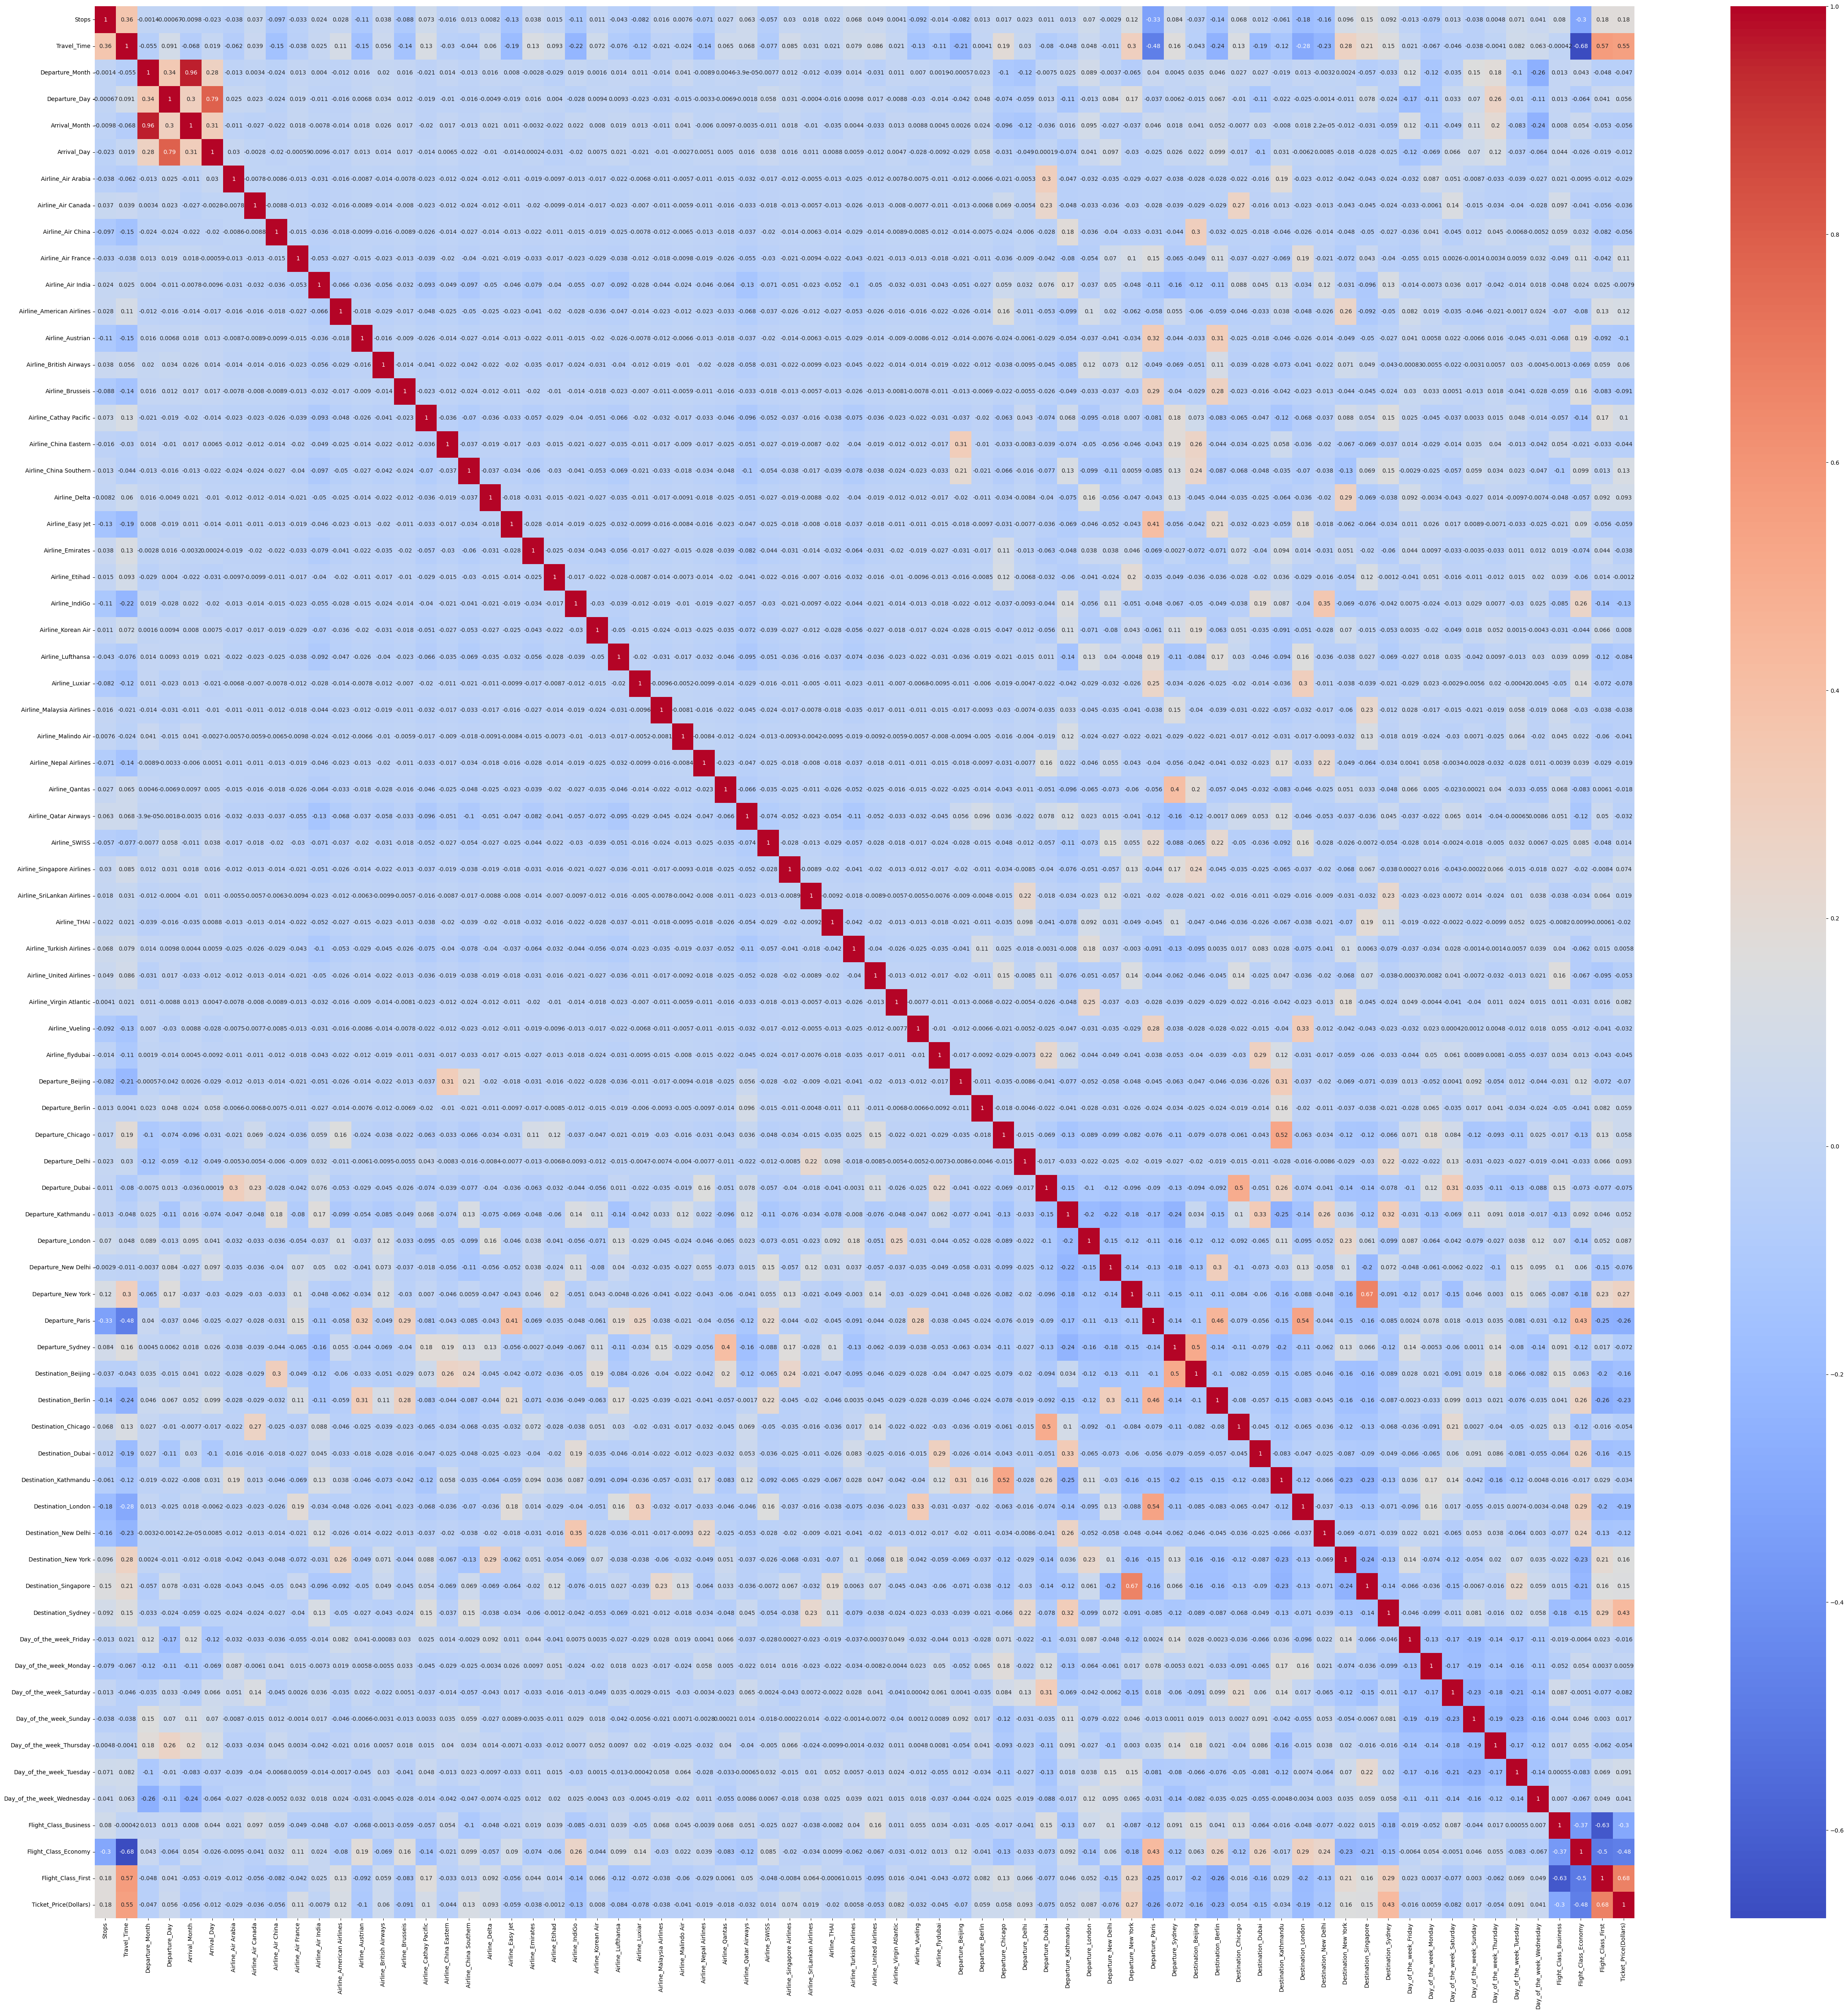

In [53]:
# Finding correlation between Independent and Dependent attributes

plt.figure(figsize=(60,60))

sns.heatmap(Train_Data.corr(), annot= True, cmap="coolwarm")

plt.show()

If two independent features are highly correlated around a percentage such as 90% or 80 % then we can drop one feature as both perform the same tasks.

In [56]:
#  Converting the column vector into a 1D array as Scikit-learn model expects a 1D arrray for the target variable y1
y1 = y1.values.flatten()

In [57]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X1, y1)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[5.14825298e-04 6.54014232e-02 4.16459645e-03 1.98908949e-03
 2.94921126e-03 1.60288965e-03 9.51268567e-05 8.72456205e-05
 1.25737290e-04 8.84574788e-02 4.32820556e-03 3.07847979e-03
 2.38425515e-06 4.85333648e-04 3.93287257e-06 8.35120326e-03
 3.62997087e-04 7.91151869e-02 9.44255895e-05 3.71192341e-04
 1.04389602e-03 4.67479723e-04 1.15005606e-04 1.87850223e-03
 2.13621089e-02 7.83187259e-06 3.59786501e-04 4.92429932e-05
 2.84359655e-03 1.16109372e-04 1.03943964e-02 1.71934360e-02
 1.78942607e-02 3.30551982e-03 1.35726500e-03 1.32237047e-02
 1.54460930e-04 2.92467716e-05 1.91196153e-04 1.26737181e-04
 4.32881376e-03 6.59608219e-04 5.67263535e-04 5.62349738e-05
 2.59674569e-04 6.74035819e-03 1.35864549e-02 7.48241713e-03
 4.63911463e-03 1.61803088e-03 2.07490622e-03 1.79852835e-03
 3.03592557e-04 1.16915312e-03 1.98717349e-04 3.13070241e-03
 1.55439957e-03 3.91512000e-05 2.99221095e-02 6.48339986e-03
 6.60071687e-02 4.73762158e-04 2.46383069e-03 2.15611207e-03
 1.30077021e-03 6.518622

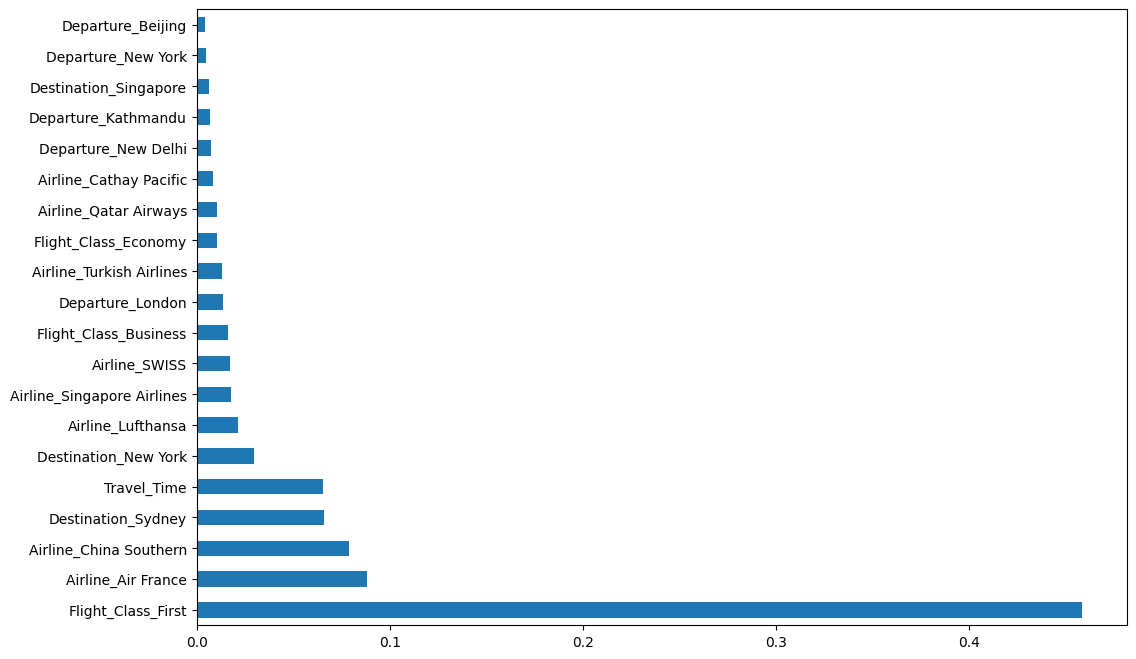

In [59]:
#plot graph of feature importance for better visualization 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [58]:
# Splitting X1, y1 dataset again

# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [84]:
#  Converting the column vector into a 1D array as Scikit-learn model expects a 1D arrray for the target variable y1

# y1 = y1.ravel()

In [60]:
# Using Random Forrest Regression to fit train data

reg_rf = RandomForestRegressor()
reg_rf.fit(X1, y1)

RandomForestRegressor()

In [61]:
Test_Data.columns

Index(['Stops', 'Travel_Time', 'Departure_Month', 'Departure_Day',
       'Arrival_Month', 'Arrival_Day', 'Airline_Air Arabia',
       'Airline_Air Canada', 'Airline_Air China', 'Airline_Air France',
       'Airline_Air India', 'Airline_American Airlines', 'Airline_Austrian',
       'Airline_British Airways', 'Airline_Brusseis', 'Airline_Cathay Pacific',
       'Airline_China Eastern', 'Airline_China Southern', 'Airline_Delta',
       'Airline_Easy Jet', 'Airline_Emirates', 'Airline_Etihad',
       'Airline_IndiGo', 'Airline_Korean Air', 'Airline_Lufthansa',
       'Airline_Luxiar', 'Airline_Malaysia Airlines', 'Airline_Malindo Air',
       'Airline_Nepal Airlines', 'Airline_Qantas', 'Airline_Qatar Airways',
       'Airline_SWISS', 'Airline_Singapore Airlines',
       'Airline_SriLankan Airlines', 'Airline_THAI',
       'Airline_Turkish Airlines', 'Airline_United Airlines',
       'Airline_Virgin Atlantic', 'Airline_Vueling', 'Airline_flydubai',
       'Departure_Beijing', 'Departure_B

In [62]:
X2 = Test_Data.loc[:, ['Stops', 'Travel_Time', 'Departure_Month', 'Departure_Day',
       'Arrival_Month', 'Arrival_Day', 'Airline_Air Arabia',
       'Airline_Air Canada', 'Airline_Air China', 'Airline_Air France',
       'Airline_Air India', 'Airline_American Airlines', 'Airline_Austrian',
       'Airline_British Airways', 'Airline_Brusseis', 'Airline_Cathay Pacific',
       'Airline_China Eastern', 'Airline_China Southern', 'Airline_Delta',
       'Airline_Easy Jet', 'Airline_Emirates', 'Airline_Etihad',
       'Airline_IndiGo', 'Airline_Korean Air', 'Airline_Lufthansa',
       'Airline_Luxiar', 'Airline_Malaysia Airlines', 'Airline_Malindo Air',
       'Airline_Nepal Airlines', 'Airline_Qantas', 'Airline_Qatar Airways',
       'Airline_SWISS', 'Airline_Singapore Airlines',
       'Airline_SriLankan Airlines', 'Airline_THAI',
       'Airline_Turkish Airlines', 'Airline_United Airlines',
       'Airline_Virgin Atlantic', 'Airline_Vueling', 'Airline_flydubai',
       'Departure_Beijing', 'Departure_Berlin', 'Departure_Chicago',
       'Departure_Delhi', 'Departure_Dubai', 'Departure_Kathmandu',
       'Departure_London', 'Departure_New Delhi', 'Departure_New York',
       'Departure_Paris', 'Departure_Sydney', 'Destination_Beijing',
       'Destination_Berlin', 'Destination_Chicago', 'Destination_Dubai',
       'Destination_Kathmandu', 'Destination_London', 'Destination_New Delhi',
       'Destination_New York', 'Destination_Singapore', 'Destination_Sydney',
       'Day_of_the_week_Friday', 'Day_of_the_week_Monday',
       'Day_of_the_week_Saturday', 'Day_of_the_week_Sunday',
       'Day_of_the_week_Thursday', 'Day_of_the_week_Tuesday',
       'Day_of_the_week_Wednesday', 'Flight_Class_Business',
       'Flight_Class_Economy', 'Flight_Class_First']]

In [63]:
X2

,Stops,Travel_Time,Departure_Month,Departure_Day,Arrival_Month,Arrival_Day,Airline_Air Arabia,Airline_Air Canada,Airline_Air China,Airline_Air France,...,Day_of_the_week_Friday,Day_of_the_week_Monday,Day_of_the_week_Saturday,Day_of_the_week_Sunday,Day_of_the_week_Thursday,Day_of_the_week_Tuesday,Day_of_the_week_Wednesday,Flight_Class_Business,Flight_Class_Economy,Flight_Class_First
7161,1,17,11,2,11,2,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
25248,2,19,1,13,1,14,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
12920,2,19,11,25,11,25,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
22424,1,33,1,2,1,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
22681,1,16,1,2,1,4,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,1,5,11,19,11,21,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7887,2,26,11,4,11,5,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
20211,2,39,12,28,12,30,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
16761,1,28,12,8,12,10,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [64]:
y2 = Test_Data.loc[:,['Ticket_Price(Dollars)']]

In [65]:
y2

,Ticket_Price(Dollars)
7161,595.0
25248,684.0
12920,684.0
22424,792.0
22681,720.0
...,...
10996,150.0
7887,676.0
20211,1443.0
16761,756.0


In [66]:
# We are predicting with respect to Test data

y_pred = reg_rf.predict(X2)
 

In [67]:
# Score based on train data

reg_rf.score(X1,y1)

0.9994924935088582

In [68]:
# Score based on test data

reg_rf.score(X2, y2)

0.9964494771679044

In [69]:
y2.shape

(7949, 1)

In [70]:
y_pred.shape

(7949,)

In [71]:
y2 = y2.to_numpy()

y2 = y2.reshape(-1)

y2.shape

(7949,)

<function matplotlib.pyplot.show(close=None, block=None)>

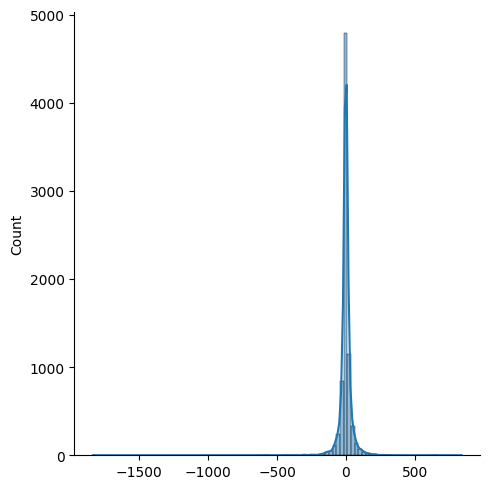

In [72]:
diff = y2 - y_pred
sns.displot(diff, bins = 100,  kde=True)
plt.show

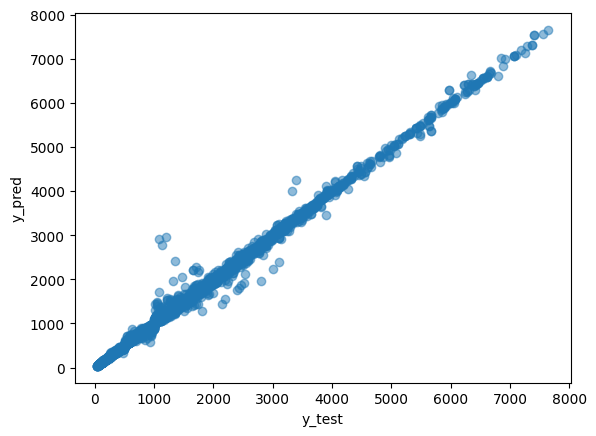

In [73]:
plt.scatter(y2, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
from sklearn import metrics

In [75]:
print('MAE:', metrics.mean_absolute_error(y2, y_pred))
print('MSE:', metrics.mean_squared_error(y2, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2, y_pred)))

MAE: 23.27922709083176
MSE: 4048.0448866499773
RMSE: 63.62424763130781


This suggests the model is performing well

In [76]:
metrics.r2_score(y2, y_pred)

0.9964494771679044

# Hyperparameter Tuning

Choose following method for hyperparameter tuning

1. RandomizedSearchCV --> Fast
2. GridSearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
# Randomized Search CV

# Number of tress in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [79]:
# Create the random grid


random_grid = {
    'n_estimators': n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [80]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1 )

In [81]:

rf_random.fit(X1, y1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  24.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  30.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  24.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  23.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  23.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  21.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  21.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [83]:
prediction = rf_random.predict(X2)

<Figure size 800x800 with 0 Axes>

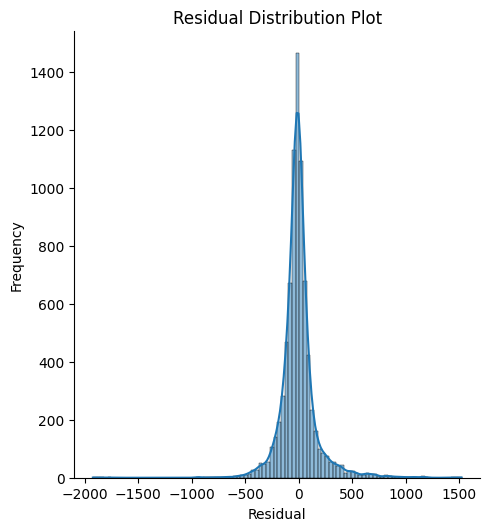

In [84]:
plt.figure(figsize=(8,8))
sns.displot(y2 - prediction, bins=100, kde=True)
plt.title('Residual Distribution Plot')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

The plot looks like gaussian distributed data

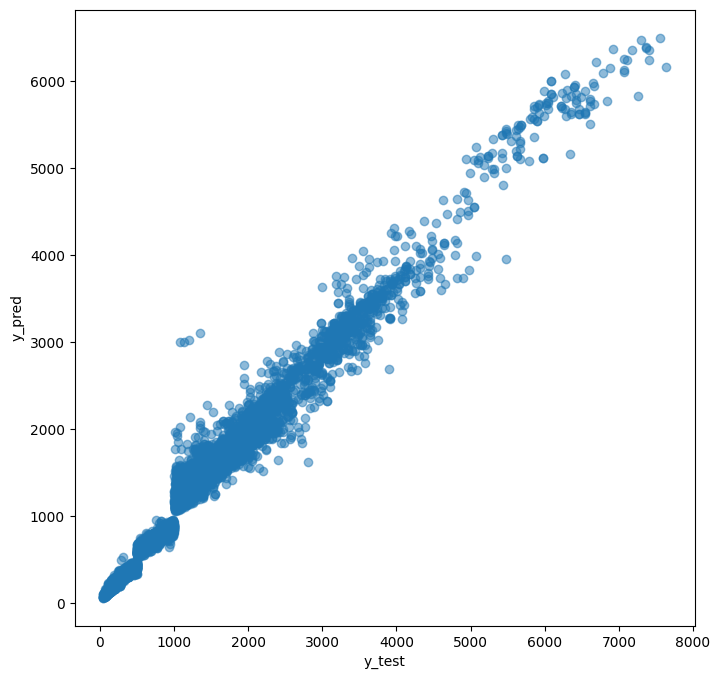

In [85]:
plt.figure(figsize= (8,8))
plt.scatter(y2, prediction, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

In [86]:
print('MAE:', metrics.mean_absolute_error(y2, prediction))
print('MSE:', metrics.mean_squared_error(y2, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2, prediction)))

MAE: 103.78327545439059
MSE: 30345.393949559864
RMSE: 174.1992937688321


Save the model to reuse it again

In [87]:
import pickle
#open a file, where you want to store the data

# file = open('flight_price_rf_v2.pkl', 'wb')

# #dump information to that file
# pickle.dump(rf_random, file)


In [88]:
model = open('flight_price_rf_v2.pkl', 'rb')
forest = pickle.load(model)

In [89]:
y_prediction = forest.predict(X2)

In [90]:
metrics.r2_score(y2, y_prediction)

0.9733841849377296

In [92]:
list = [1, 8, 9, 7, 9, 8, 0, 0, 1, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0, 0, 0, 0,
       0, 0, 0, 0,
       0, 0,
       0, 0, 0,
       1, 0, 0,
       0, 0, 1,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0,
       0, 0,
       0, 0,
       1, 0,
       1, 0]

In [93]:
array = np.array(list)

In [94]:
array = array.reshape(1,-1)

In [95]:
forest.predict(array)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([369.80325794])

In [ ]:
# ['Stops', 'Travel_Time', 'Departure_Month', 'Departure_Day',
#        'Arrival_Month', 'Arrival_Day', 'Airline_Air Arabia',
#        'Airline_Air Canada', 'Airline_Air China', 'Airline_Air France',
#        'Airline_Air India', 'Airline_American Airlines', 'Airline_Austrian',
#        'Airline_British Airways', 'Airline_Brusseis', 'Airline_Cathay Pacific',
#        'Airline_China Eastern', 'Airline_China Southern', 'Airline_Delta',
#        'Airline_Easy Jet', 'Airline_Emirates', 'Airline_Etihad',
#        'Airline_IndiGo', 'Airline_Korean Air', 'Airline_Lufthansa',
#        'Airline_Luxiar', 'Airline_Malaysia Airlines', 'Airline_Malindo Air',
#        'Airline_Nepal Airlines', 'Airline_Qantas', 'Airline_Qatar Airways',
#        'Airline_SWISS', 'Airline_Singapore Airlines',
#        'Airline_SriLankan Airlines', 'Airline_THAI',
#        'Airline_Turkish Airlines', 'Airline_United Airlines',
#        'Airline_Virgin Atlantic', 'Airline_Vueling', 'Airline_flydubai',
#        'Departure_Beijing', 'Departure_Berlin', 'Departure_Chicago',
#        'Departure_Delhi', 'Departure_Dubai', 'Departure_Kathmandu',
#        'Departure_London', 'Departure_New Delhi', 'Departure_New York',
#        'Departure_Paris', 'Departure_Sydney', 'Destination_Beijing',
#        'Destination_Berlin', 'Destination_Chicago', 'Destination_Dubai',
#        'Destination_Kathmandu', 'Destination_London', 'Destination_New Delhi',
#        'Destination_New York', 'Destination_Singapore', 'Destination_Sydney',
#        'Day_of_the_week_Friday', 'Day_of_the_week_Monday',
#        'Day_of_the_week_Saturday', 'Day_of_the_week_Sunday',
#        'Day_of_the_week_Thursday', 'Day_of_the_week_Tuesday',
#        'Day_of_the_week_Wednesday', 'Flight_Class_Business',
#        'Flight_Class_Economy', 'Flight_Class_First']

In [96]:
# Prediction of price for December 20th, 2023 from New Delhi to Singapore in Malaysia Airlines Airlines
# Stops = 2, Travel hours = 30, Date = 2023-12-20 to 202-12-22, Airline = Malaysia Airlines,
# Departure = New Delhi, Arrival = Singapore, weekday = Friday, flight class = Business
test = np.array([2, 30, 12, 20,
       12, 22, 0, 0, 0, 0,
       0, 0, 0,
       0, 0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       1, 0, 0,
       0, 0, 0,
      0, 0,
       0, 0,
       0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       1, 0, 0,
       0, 0, 0,
       0, 0,
       0, 0, 0,
       0, 1, 0,
       1, 0,
      0, 0,
       0, 0,
       0, 1,
       0, 0])

In [97]:
test = test.reshape(1,-1)

In [98]:
forest.predict(test)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([815.45265527])

In [103]:
# Prediction of price for December 12th, 2023 from Sydney to London in Singapore Airlines
# Stops = 3, Travel hours = 40, Date = 2023-12-30 to 2024-01-01, Airline = Singapore airlines, 
# Departure = Sydney, Arrival = London, weekday = Saturday, flight class = first

test2 = np.array([3, 40, 12, 30,
       1, 1, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 1,
       0, 0,
       0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 1, 0,
       0, 0, 0,
       0, 1, 0,
       0, 0, 0,
       0, 0,
       1, 0,
       0, 0,
       0, 0,
       0, 1])

In [104]:
test2 = test2.reshape(1,-1)

In [105]:
price = forest.predict(test2)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [106]:
# Chicago to New York on November 16th 
# Stops = 0, Travel Time = 3, Departure month = 11, Departure day = 16, Arrival month = 11, 
# Arrival day = 16, Airline = American Airlines, Departure = Chicago, Arrival = New York, 
# flight class = First , Day =Monday

test3 = np.array([[0, 3, 11, 16,
       11, 16, 0,
       0, 0, 0,
       0, 1, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0,
       0, 0,
       0, 0,
       0, 0, 0,
       0, 0, 1,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       1, 0, 1,
       0, 1,
       0, 0,
       0, 0,
       0, 0,
       0, 1]])

In [107]:
test3 = test3.reshape(1,-1)

In [108]:
forest.predict(test3)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1968.81923836])

In [109]:
# Airline = Qatar, Departure = kathmandu, Arrival = New York, Depart day = 4, month 10, arrive month = 10, arrival day = 12
# week day = wednesday, class = economy

test4 = np.array([1, 32, 10, 10,
       10, 12, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 1,
       0, 0,
       0, 0,
       0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 1,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       1, 0, 0,
       0, 0,
       0, 0,
       0, 0,
       1, 0,
       1, 0])

In [110]:
test4 = test4.reshape(1,-1)

forest.predict(test4)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([561.64652563])